## Step 1: Import the wine dataset and split it into training and testing parts

In [2]:
from sklearn.datasets import load_wine
dataset=load_wine()
print("feature names:",dataset.feature_names)
print("target names:",dataset.target_names)

feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target names: ['class_0' 'class_1' 'class_2']


In [4]:
X=dataset.data
y=dataset.target
print("shape of input data:",X.shape)
print("shape of output data:",y.shape)

shape of input data: (178, 13)
shape of output data: (178,)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=15,test_size=0.15)

## Step 2: Build the tree
### Import the class *DecisionTreeClassifier* from sklearn.tree module.
#### We can use parameter *croterion* to set the metric for the split. Possible metrics (criterion) are 'gini' (default), 'entropy' or 'log_loss'.

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree1=DecisionTreeClassifier()
tree1.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
tree2=DecisionTreeClassifier(criterion="entropy")
tree2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Step 3: Evaluate the performance of the tree

--> Compute both Training Accuracy and Test Accuracy to check overfitting

In [8]:
from sklearn.metrics import accuracy_score
training_accuracy=accuracy_score(y_train,tree1.predict(X_train))
testing_accuracy=accuracy_score(y_test,tree1.predict(X_test))
print(training_accuracy)
print(testing_accuracy)

1.0
0.9259259259259259


In [9]:
training_accuracy2=accuracy_score(y_train,tree2.predict(X_train))
testing_accuracy2=accuracy_score(y_test,tree2.predict(X_test))
print(training_accuracy2)
print(testing_accuracy2)

1.0
0.9259259259259259


## Step 4: Visualize the tree
### Visual tree can be generated using *sklearn.tree.plot_tree(tree, class_names, feature_names, impurity, filled)* function.
### Set the figure size using *matplotlib.pyplot.figure(figsize = (w, h))*

[Text(0.5657894736842105, 0.9166666666666666, 'proline <= 755.0\ngini = 0.654\nsamples = 151\nvalue = [51, 62, 38]\nclass = class_1'),
 Text(0.34210526315789475, 0.75, 'color_intensity <= 4.85\ngini = 0.486\nsamples = 95\nvalue = [2, 59, 34]\nclass = class_1'),
 Text(0.21052631578947367, 0.5833333333333334, 'flavanoids <= 0.895\ngini = 0.154\nsamples = 61\nvalue = [2, 56, 3]\nclass = class_1'),
 Text(0.10526315789473684, 0.4166666666666667, 'alcalinity_of_ash <= 15.3\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = class_2'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = class_2'),
 Text(0.3157894736842105, 0.4166666666666667, 'alcohol <= 13.145\ngini = 0.068\nsamples = 57\nvalue = [2, 55, 0]\nclass = class_1'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 51\nvalue = [0, 51, 0]\nclass = class_1'),
 Text(0.3684210526315789, 0.25, 'colo

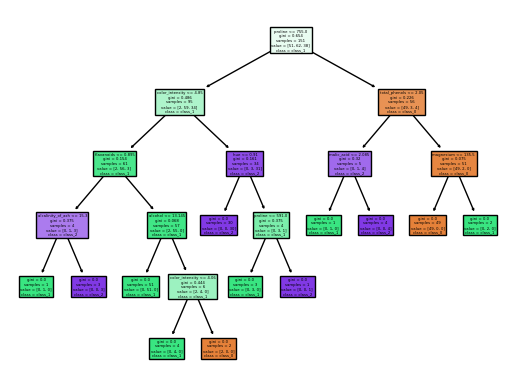

In [10]:
from sklearn.tree import plot_tree
plot_tree(tree1,class_names=['class_0','class_1','class_2'],feature_names=dataset.feature_names,filled=True)

## Step 5: Handle the overfitting by limiting the depth
### Use *max_depth* parameter with DecisionTreeClassifier() to limit the depth

[Text(0.5, 0.875, 'proline <= 755.0\ngini = 0.654\nsamples = 151\nvalue = [51, 62, 38]\nclass = class_1'),
 Text(0.25, 0.625, 'color_intensity <= 4.85\ngini = 0.486\nsamples = 95\nvalue = [2, 59, 34]\nclass = class_1'),
 Text(0.125, 0.375, 'flavanoids <= 0.895\ngini = 0.154\nsamples = 61\nvalue = [2, 56, 3]\nclass = class_1'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'hue <= 0.91\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]\nclass = class_2'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'total_phenols <= 2.05\ngini = 0.226\nsamples = 56\nvalue = [49, 3, 4]\nclass = class_0'),
 Text(0.625, 0.375, 'malic_acid <= 2.085\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = class_2'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'magnesium <= 135.5\ngini = 0.075\nsamples = 51\nvalue = [49, 2, 0]\nclass = class_0'),
 Text(0.8125

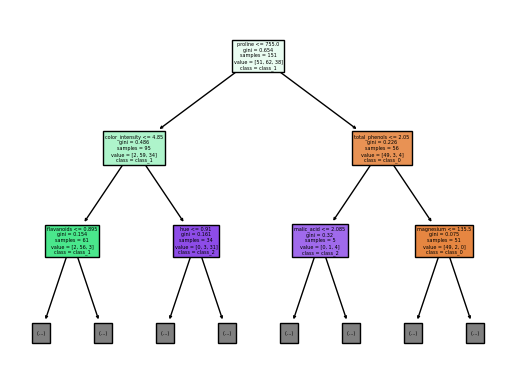

In [11]:
plot_tree(tree1,class_names=['class_0','class_1','class_2'],feature_names=dataset.feature_names,filled=True,max_depth=2)